# Setup

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib, os

from lib import path_tools as pt
from lib import import_data
from lib import analysis

# XRD

In [3]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [4]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [5]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
XRD_data = {}

# ETB-046 Variables
samples_dir = {
    "etb066": "200118 ETB-066 MAPbCl on quartz FF growth temp/",
    "etb067": "200119 ETB-067 MAPbCl on quartz FF growth temp/",
#     "etb051": "191030 ETB-051 MAPbBr on glass FF/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])


Creating new local data folder.
Creating new local data folder.


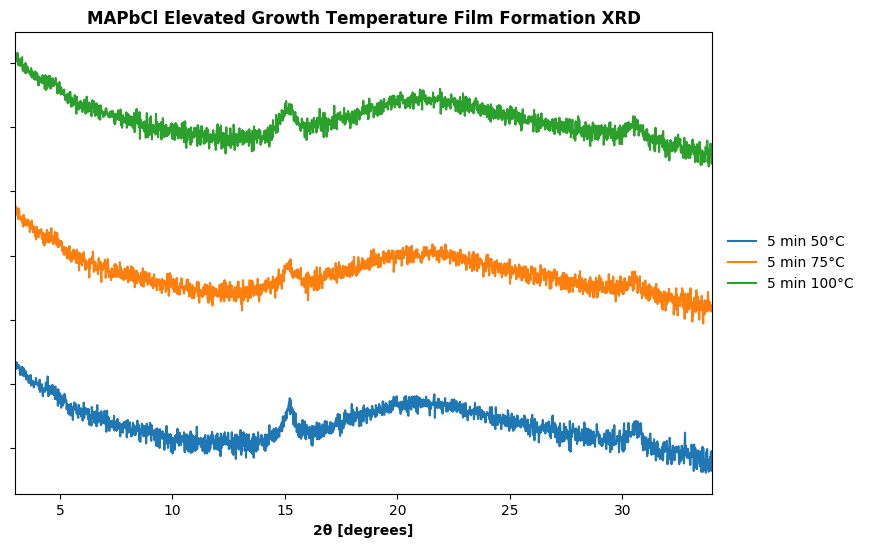

In [31]:
fig = plt.figure(1, figsize=[9, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
    "5min 50C",
    "5min 75C",
    "5min 100C",
#     "15min 50C",
#     "15min 75C",
#     "15min 100C",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=lbl)
            
            offset += samplemax
            
plt.style.use('default')

plt.xlabel("2θ [degrees]", weight="semibold")
# plt.ylabel("Counts", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(min(XRD_data["etb066"]["15min 50C"]["2theta"]), max(XRD_data["etb066"]["15min 50C"]["2theta"]))

plt.title("MAPbCl Elevated Growth Temperature Film Formation XRD",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.005, 0,.22,1), mode='expand', frameon=False)

In [32]:
fig.savefig("plots/200123/XRD/MAPbCL_5min_T_all_stacked_log.png", dpi=200, format='png', bbox_inches='tight')

# PL

In [4]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "pl"

In [5]:
importlib.reload(import_data)
importlib.reload(analysis)

<module 'lib.analysis' from '/home/tomas/Documents/sciencetools_py/lib/analysis.py'>

In [6]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
pl_data = {}
# ETB-046 Variables
samples_dir = {
    "etb062": "191208 ETB-062 MAPbCl on quartz FF/",
    "etb063": "191208 ETB-063 MAPbCl on quartz FF/",
    "etb064": "191208 ETB-064 MAPbCl on quartz FF/",
}

for run_ID in samples_dir:
    pl_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


/home/tomas/Documents/sciencetools_py/lib/analysis.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:27: FutureWarning: `item` has been deprecated and will be removed in a future version
  fwhm = right_bound['wavelength'].item() - left_bound['wavelength'].item()
/home/tomas/Documents/sciencetools_py/lib/analysis.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
  max_location['wavelength'].item(),


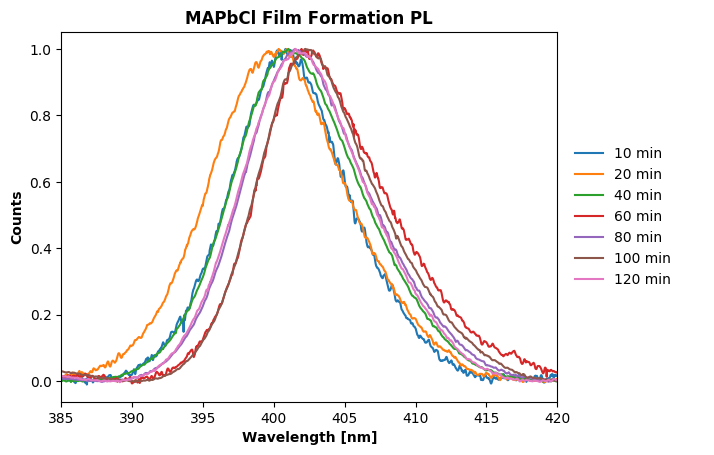

In [14]:
fig = plt.figure(1)
fig_ax = plt.gca()

lbl = None

master_cypher = (
#     "30sec",
#     "1min",
#     "2min",
#     "3min",
#     "4min",
#     "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
            raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            if "min" in sample_ID:
                lbl = sample_ID.replace("min", " min")
            elif "sec" in sample_ID:
                lbl = sample_ID.replace("sec", " sec")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"]/
                     abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=lbl)
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Counts", weight="semibold")
# fig_ax.set_yticklabels([])
# plt.xlim(min(pl_data["etb066"]["15min 50C"]["wavelength"]), max(pl_data["etb066"]["15min 50C"]["wavelength"]))
plt.xlim(385,420)

plt.title("MAPbCl Film Formation PL",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.3,1),mode='expand', frameon=False)

In [15]:
fig.savefig("plots/200123/PL/MAPbCL_all_stacked_norm.png", dpi=200, format='png', bbox_inches='tight')

In [16]:
max_values.to_csv('plots/200123/PL/MAPbCL_all_stacked_norm.csv')